In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
import numpy as np

In [20]:
class Hexgrid():
    def __init__(self, Nx, Ny, dx=1):
        self.Nx = Nx
        self.Ny = Ny
        self.height = np.zeros((Nx, Ny))
        self.dx = dx
        self.repositeAngle = np.deg2rad(20)
        self.X = np.zeros((Nx, Ny, 2))
        for j in range(Ny):
            self.X[:,j,0] = j*self.dx/2 + np.arange(Nx) * dx
            self.X[:,j,1] = np.ones(Nx) * self.dx*np.sqrt(3)/2 * j
        
    def get_neighbour_indices(self, i, j):
        indices = []
        # Adding North-West
        if (j - 1 >= 0):
            indices.append((i,j-1))
        # Adding North-East
        if (j - 1 >= 0) and (i + 1 < self.Nx):
            indices.append((i+1, j-1))
        # Adding East
        if (i+1 < self.Nx):
            indices.append((i+1, j))
        # Adding South-East
        if (j+1 < self.Ny):
            indices.append((i,j+1))
        # Adding South-West
        if (i-1 >= 0) and (j+1 < self.Ny):
            indices.append((i-1, j+1))
        if (i-1 >= 0):
            indices.append((i-1, j))
        return indices
        
    def update_height(self):
        # Starting with an approach based on double for loop
        # TODO: Optimize this to using array expressions where possible
        
        # First, make copy of current height array
        old_height = self.height.copy()
        
        for i in range(self.Nx):
            for j in range(self.Ny):
                # Loop over neighbours
                frac = []
                transferToIndex = []
                for k, l in self.get_neighbour_indices(i, j):
                    # Calculate angle
                    heightDiff = old_height[i,j] - old_height[k, l] # Find height diff
                    angle = np.arctan(heightDiff/self.dx)
                    if (angle > self.repositeAngle) and (old_height[i,j] > 0):
                        frac.append(0.5 * (heightDiff - self.dx * np.tan(self.repositeAngle))/old_height[i,j])
                        transferToIndex.append((k, l))

                for n, (k, l) in enumerate(transferToIndex):
                    deltaS = old_height[i,j]*(frac[n]/frac.__len__())
                    self.height[i,j] -= deltaS
                    self.height[k,l] += deltaS



# A simple test case

In [38]:
grid = Hexgrid(50, 50)
grid.height[25, 25] = 1000

for i in range(50):
    grid.update_height()

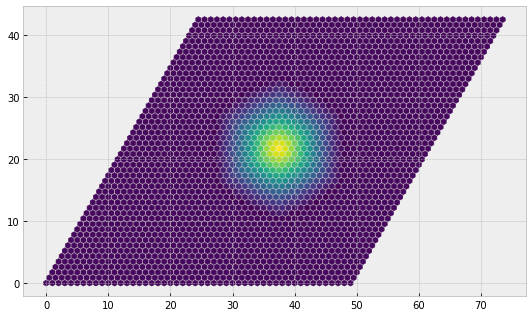

In [39]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, aspect = 'equal')
ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = 'h', c = grid.height.flatten())

In [40]:
grid = Hexgrid(50, 50)
grid.height[0,0] = 5000
grid.height[25, 25] = 50000
grid.height[49, 49] = 5000

for i in range(50):
    grid.update_height()

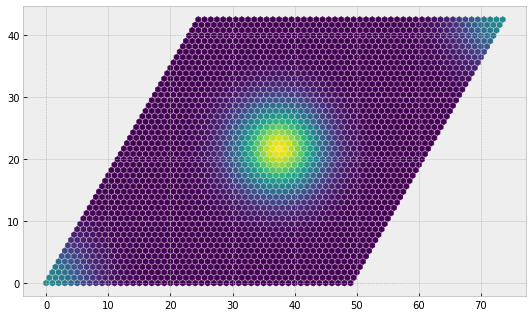

In [41]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, aspect = 'equal')
ax.scatter(grid.X[:,:,0].flatten(), grid.X[:,:,1].flatten(), marker = 'h', c = grid.height.flatten())

# Re-writing to global array operations

In [ ]:
h_new = np.ones((5,5))
h_old = np.ones((5,5))

h_new[1:-1, 1:-1] = h_old[2:, 1:-1]

# Possible approach:
#   For each cell, calculate the angle to the neighbours
angle = np.zeros((Nx, Ny, 6)) # 6 because 6 neighbours (NW, NE, E, SE, SW, W)
#   Then, calculate amount transferred to each neighbour
deltaS = np.zeros((Nx, Ny, 6)) # 6 because 6 neighbours (NW, NE, E, SE, SW, W)
#    Finally, apply all changes
self.height += deltaS


# Example: Calculate angle for neighbour to NE:
heightDiff = old_height[:-1,1:] - old_height[1:, :-1] # Find height diff
angle[:,:,1] = np.arctan(heightDiff/self.dx)